# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from datetime import datetime



## Загрузка данных

In [2]:
for dfi in pd.read_csv('D:\олимпиада\Dataset\Full_16_09_22.csv', sep='$', chunksize=1000):
    df_full = dfi    
    break
for i,dfi in enumerate(tqdm(pd.read_csv('D:\олимпиада\Dataset\Full_16_09_22.csv', sep='$', chunksize=1000))):
    if i>=1:
        df_full = df_full.append(dfi, ignore_index = True)


44it [00:11,  2.85it/s]

In [2]:
for dfi in pd.read_csv('D:\олимпиада\Dataset\Full_16_09_22.csv', sep='$', chunksize=1000):
    df = dfi    
    break
for i,dfi in enumerate(tqdm(pd.read_csv('D:\олимпиада\Dataset\Full_16_09_22.csv', sep='$', chunksize=1000))):
    if i>=1:
        df = df.append(dfi, ignore_index = True)
    if i>=9: break

9it [00:04,  2.00it/s]


In [3]:
data = df

### 1) Посмотрим на произвольные строки

In [4]:
data.head()

,Корневой ИД заявки,ИД версии заявки,Номер заявки,Уникальный номер обращения ГУ (mos.ru),Дата создания заявки в формате Timezone,Дата начала действия версии заявки в формате Timezone,Наименование источника поступления заявки,Код источника поступления заявки,Имя создателя заявки,Признак инцидента,...,Дата закрытия,Желаемое время с,Желаемое время до,Дата отзыва/оценки,Отзыв,Оценка качества выполнения работ,Код оценки качества выполнения ра,Наименование категории платности,Код категории платности,Признак оплаты картой
0,73407319,73407724,00000001/21,NaN,2021-01-01 00:01:09.519196+03,2021-01-01 01:05:24.918411+03,телефон,phone,frontline,Нет,...,2021-01-01 01:05:24.918411+03,NaN,NaN,NaN,NaN,NaN,NaN,бесплатная,free,Нет
1,73407334,73518681,00000002/21,NaN,2021-01-01 00:05:37.696825+03,2021-01-03 15:55:37.043081+03,телефон,phone,frontline,Нет,...,2021-01-01 01:03:13.839464+03,NaN,NaN,NaN,NaN,NaN,NaN,бесплатная,free,Нет
2,73407348,73407875,00000003/21,NaN,2021-01-01 00:10:24.013142+03,2021-01-01 01:26:50.498063+03,Виртуальный оператор,robot,robot_req,Нет,...,2021-01-01 01:26:50.498063+03,NaN,NaN,NaN,NaN,NaN,NaN,бесплатная,free,Нет
3,73407353,73415362,00000004/21,NaN,2021-01-01 00:11:36.915305+03,2021-01-01 11:19:31.973065+03,Виртуальный оператор,robot,robot_req,Да,...,2021-01-01 11:19:31.973065+03,NaN,NaN,NaN,NaN,NaN,NaN,бесплатная,free,Нет
4,73407366,73518683,00000005/21,NaN,2021-01-01 00:13:20.704235+03,2021-01-03 15:55:37.42304+03,телефон,phone,frontline,Да,...,2021-01-01 00:41:08.708978+03,NaN,NaN,2021-04-16 01:43:28.840557+03,Работы выполнены,Плохо,bad,бесплатная,free,Нет


In [5]:
data['Адрес проблемы']

0                    Кутузовский проспект, дом 15
1                   город Зеленоград, корпус 1418
2               Студёный проезд, дом 38, корпус 1
3                Большая Грузинская улица, дом 42
4                     Кастанаевская улица, дом 11
                          ...                    
9995                   Алтуфьевское шоссе, дом 86
9996            Ангарская улица, дом 23, корпус 1
9997                    улица Бестужевых, дом 25А
9998                   11-я Парковая улица, дом 8
9999    проспект Маршала Жукова, дом 74, корпус 1
Name: Адрес проблемы, Length: 10000, dtype: object

Комментарии!

Номер материнской заявки!

Признак дефекта возврата на доработку!

Признак инцидента?

Наименование источника поступления заявки

Наименование категории платности?

In [6]:
data['Корневой идентификатор материнской заявки']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: Корневой идентификатор материнской заявки, Length: 10000, dtype: float64

In [ ]:
from datetime import datetime
datetime.strptime('2021-01-01 00:01:09.519196+03'[:-3], '%Y-%m-%d %H:%M:%S.%f').strftime('%Y-%m-%d %H:%M')

'2021-01-01 00:01'

In [ ]:
data_search = data.drop(['Этаж','Наименование категории платности','Код категории срочности','Наименование охранных мероприятий','Идентификатор организации-исполнителя','Дата начала действия версии заявки в формате Timezone','ОДС (номер объединенной диспетчерской службы)','ИНН организации-исполнителя','Наименование статуса заявки','Наименование статуса заявки','Наименование причины отказа исполнителя','Идентификатор причины отказа исполнителя','Наименование причины отказа Организации-исполнителя','Идентификатор причины отказа Организации-исполнителя','Признак оплаты картой','Отзыв','Израсходованный материал','Оценка качества выполнения работ','Идентификатор корневой версии вида выполненных работ','Результативность','Код результативности','Идентификатор корневой версии охранных мероприятий','Желаемое время с','Желаемое время до','Дата отзыва/оценки','Дата последнего возврата на доработку','Наименование источника поступления заявки','Наличие у заявителя вопроса','Наименование дефекта','Признак инцидента','Номер материнской заявки','Комментарии','Признак дефекта возврата на доработку','Идентификатор дефекта', 'Краткое наименование дефекта','Признак нахождения на доработке','Корневой идентификатор категории дефекта', 'Код категории дефекта','Признак “Оповещен”','Корневой идентификатор материнской заявки','Уникальный номер обращения ГУ (mos.ru)','Имя создателя заявки', 'Код источника поступления заявки', 'Пользователь, внесший последнее изменение', 'Код категории платности', 'Роль организации пользователя', 'ИД версии заявки','Корневой ИД заявки','Код дефекта'], axis =1)
data_search

,Номер заявки,Дата создания заявки в формате Timezone,Наименование категории дефекта,Описание,"Наименование категории срочности: Аварийная, Обычная",Наименование округа,Код округа,Наименование района,Код района,Адрес проблемы,УНОМ,Подъезд,Квартира,Наименование управляющей компании,Наименование обслуживавшей организации (исполнителя),Код статуса заявки,Вид выполненных работ,Кол-во возвратов на доработку,Дата закрытия,Код оценки качества выполнения ра
0,00000001/21,2021-01-01 00:01:09.519196+03,Канализация,Унитаз вода переливается,Аварийная,ЗАО,800,Дорогомилово,805,"Кутузовский проспект, дом 15",12407,1,13,ГБУ «ЖИЛИЩНИК РАЙОНА ДОРОГОМИЛОВО»,Аварийная служба (Дорогомилово),request_resolved,Засор унитаза устранен,NaN,2021-01-01 01:05:24.918411+03,NaN
1,00000002/21,2021-01-01 00:05:37.696825+03,Сантехника,"В большой комнате и туалете сильная течь, у со...",Аварийная,ЗелАО,1000,Крюково,1005,"город Зеленоград, корпус 1418",31168,4,207,ГБУ «ЖИЛИЩНИК ЗЕЛАО»,Мастерский участок № 14 (Крюково),request_resolved,"Разовое залитие (по вине соседей, выполнение р...",NaN,2021-01-01 01:03:13.839464+03,NaN
2,00000003/21,2021-01-01 00:10:24.013142+03,Отопление,Батарея ледяная в комнате холодно,Аварийная,СВАО,300,Северное Медведково,314,"Студёный проезд, дом 38, корпус 1",25012,3,75,ГБУ «ЖИЛИЩНИК РАЙОНА СЕВЕРНОЕ МЕДВЕДКОВО»,Аварийная Служба (Северное Медведково),request_resolved,Перезапущен стояк,NaN,2021-01-01 01:26:50.498063+03,NaN
3,00000004/21,2021-01-01 00:11:36.915305+03,Отопление,Нет отопления по всей квартире,Обычная,ЦАО,100,Пресненский,106,"Большая Грузинская улица, дом 42",6123,1,1,ГБУ «ЖИЛИЩНИК ПРЕСНЕНСКОГО РАЙОНА»,Мастерский участок № 1 (Пресненский),request_resolved,Сброс воздуха,NaN,2021-01-01 11:19:31.973065+03,NaN
4,00000005/21,2021-01-01 00:13:20.704235+03,Отопление,во всей квартире все батареи холодные,Обычная,ЗАО,800,Филевский Парк,818,"Кастанаевская улица, дом 11",9594,5,160,ГБУ «ЖИЛИЩНИК РАЙОНА ФИЛЕВСКИЙ ПАРК»,Аварийная Служба (Филевский Парк),request_resolved,Перезапущен стояк,NaN,2021-01-01 00:41:08.708978+03,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,00009996/21,2021-01-02 11:00:46.853129+03,Уборка,"на 6 этаже забит, прочистить и убрать на площадке",Обычная,СВАО,300,Бибирево,304,"Алтуфьевское шоссе, дом 86",444,7.0,540,ГБУ «ЖИЛИЩНИК РАЙОНА БИБИРЕВО»,Мастерский участок № 1 (Бибирево),request_resolved,Засор устранен,NaN,2021-01-02 11:27:13.545069+03,NaN
9996,00009997/21,2021-01-02 11:00:56.496115+03,Отопление,Батарея чуть теплая,Обычная,САО,200,Западное Дегунино,209,"Ангарская улица, дом 23, корпус 1",632,1.0,12,ООО УК «АРГОНАВТО»,ООО УК «АРГОНАВТО»,request_resolved,Оказана консультация с выходом специалиста на ...,NaN,2021-01-02 12:00:43.829882+03,NaN
9997,00009998/21,2021-01-02 11:00:57.812163+03,Сантехника,стояк ГВС течет труба,Аварийная,СВАО,300,Отрадное,311,"улица Бестужевых, дом 25А",2052,3.0,114,ГБУ «ЖИЛИЩНИК РАЙОНА ОТРАДНОЕ»,Мастерский участок № 2 (Отрадное),request_resolved,Оказана консультация с выходом специалиста на ...,NaN,2021-01-02 11:24:02.325647+03,NaN
9998,00009999/21,2021-01-02 11:01:04.056842+03,Зимние виды работ,"подъезд 1, скользко очистить от снега очистить...",Обычная,ВАО,400,Восточное Измайлово,405,"11-я Парковая улица, дом 8",18787,1.0,6,ГБУ «ЖИЛИЩНИК РАЙОНА ВОСТОЧНОЕ ИЗМАЙЛОВО»,Мастерский участок №4 (Восточное Измайлово),request_resolved,Наледь убрана;Обработка противогололедным сред...,NaN,2021-01-02 13:15:49.228626+03,NaN


## Далаем базу для нашего сервиса

In [7]:
request = pd.DataFrame(columns = ['id', 'system_number', 'label_id','description','executor', 'company', 'criticality', 'anomaly_id' ,'time', 'adress_id', 'date', 'parent'])
label = pd.DataFrame(columns = ['id','name'])
anomaly = pd.DataFrame(columns = ['id','name'])
address = pd.DataFrame(columns = ['id','building', 'street_id', 'blok', 'aparts'])
street = pd.DataFrame(columns = ['id','name', 'district_id'])
district = pd.DataFrame(columns = ['id','name', 'region_id'])
region = pd.DataFrame(columns = ['id','name'])

In [8]:
def get_building(x):
    x = str(x)
    if 'дом' in x:
        for i in x.split(', '):
            if 'дом' in i:
                try: return i[4:]
                except: print(x)
    else:
        for i in x.split(', '):
            if 'корпус' in i:
                return i[7:]
    return None

def get_street(x):
    x = str(x)
    return x.split(', ')[0]

def get_blok(x):
    x = str(x)
    for i in x.split(', '):
        if 'дом' in x and 'корпус' in i:
            return i[7:]
    return None
data['Адрес проблемы']

0                    Кутузовский проспект, дом 15
1                   город Зеленоград, корпус 1418
2               Студёный проезд, дом 38, корпус 1
3                Большая Грузинская улица, дом 42
4                     Кастанаевская улица, дом 11
                          ...                    
9995                   Алтуфьевское шоссе, дом 86
9996            Ангарская улица, дом 23, корпус 1
9997                    улица Бестужевых, дом 25А
9998                   11-я Парковая улица, дом 8
9999    проспект Маршала Жукова, дом 74, корпус 1
Name: Адрес проблемы, Length: 10000, dtype: object

In [9]:
data1 = data
data1['building'] = data['Адрес проблемы'].apply(get_building)
data1['street']=data['Адрес проблемы'].apply(get_street)
data1['blok'] = data['Адрес проблемы'].apply(get_blok)
nan = data1['Квартира'].iloc[8]
type(nan)

float

In [10]:
for i in data1['Наименование категории дефекта'].unique():
    label = label.append(pd.DataFrame([i], columns = ['name']), ignore_index = True)
label['id'] = label.index+1
label.to_csv('label.csv',index=False)


region['id'] = data1[['Код округа','Наименование округа']].drop_duplicates()['Код округа']
region['name'] = data1[['Код округа','Наименование округа']].drop_duplicates()['Наименование округа']
region.to_csv('region.csv',index=False)
# region = pd.read_excel('region.xlsx')
# region

district['id'] = data1[['Код района','Наименование района', 'Код округа']].drop_duplicates()['Код района']
district['name'] = data1[['Код района','Наименование района', 'Код округа']].drop_duplicates()['Наименование района']
district['region_id'] = data1[['Код района','Наименование района', 'Код округа']].drop_duplicates()['Код округа']
district = district.drop_duplicates()
district.to_csv('district.csv',index=False)
# district = pd.read_excel('district.xlsx')
# district

street['name'] = data1[['Код района','street']].drop_duplicates()['street']
street['district_id'] = data1[['Код района','street']].drop_duplicates()['Код района']
street = street.drop_duplicates()
street = street.reset_index()
street['id'] = street.index+1
street.to_csv('street.csv', index = False)
# street = pd.read_excel('street.xlsx')
# street


address['building'] = data1['building']
address['street_id'] = data1['street'].apply(lambda x: street[street['name']==get_street(x)]['id'].iloc[0])
address['blok'] = data1['blok']
address['aparts'] = data1['Квартира']
address['adr'] = data1['Адрес проблемы']
address = address.drop_duplicates()
address = address.reset_index()
address['id'] = address.index+1

# address.to_csv('address.csv', index = False)

# address = pd.read_excel('address.xlsx')
# address


In [11]:
address


,index,id,building,street_id,blok,aparts,adr
0,0,1,15,1,None,13,"Кутузовский проспект, дом 15"
1,1,2,1418,2,None,207,"город Зеленоград, корпус 1418"
2,2,3,38,3,1,75,"Студёный проезд, дом 38, корпус 1"
3,3,4,42,4,None,1,"Большая Грузинская улица, дом 42"
4,4,5,11,5,None,160,"Кастанаевская улица, дом 11"
...,...,...,...,...,...,...,...
8269,9993,8270,41,680,1,274,"Ясеневая улица, дом 41, корпус 1"
8270,9995,8271,86,235,None,540,"Алтуфьевское шоссе, дом 86"
8271,9996,8272,23,298,1,12,"Ангарская улица, дом 23, корпус 1"
8272,9997,8273,25А,415,None,114,"улица Бестужевых, дом 25А"


In [12]:
data1=data

In [13]:
data1['aaa'] = data1['Адрес проблемы']
for i in range(len(data1)):
    data['aaa'][i] += ';'+ str(data1.iloc[i]['Квартира'])
data1['Дата закрытия']

C:\Users\Саша\AppData\Local\Temp\ipykernel_21532\621522906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['aaa'][i] += ';'+ str(data1.iloc[i]['Квартира'])


0       2021-01-01 01:05:24.918411+03
1       2021-01-01 01:03:13.839464+03
2       2021-01-01 01:26:50.498063+03
3       2021-01-01 11:19:31.973065+03
4       2021-01-01 00:41:08.708978+03
                    ...              
9995    2021-01-02 11:27:13.545069+03
9996    2021-01-02 12:00:43.829882+03
9997    2021-01-02 11:24:02.325647+03
9998    2021-01-02 13:15:49.228626+03
9999    2021-01-02 13:24:08.295376+03
Name: Дата закрытия, Length: 10000, dtype: object

In [14]:
def get_label(x):
    try:
        label[label['name']==x]['id'].iloc[0]
    except: None

In [28]:
def adress(x):
    s = x.split(';')
    if s[1]==str(nan): 
        return address[address['adr']==s[0]]['id'].iloc[0]
    else: 
        return address[address['adr']==s[0]][address['aparts'] == s[1]]['id'].iloc[0]

request = pd.DataFrame(columns = ['id', 'system_number', 'label_id','description','executor', 'company', 'criticality', 'anomaly_id' ,'date_start','date_end', 'datetime_start','datetime_end', 'adress_id', 'parent'])   
request['id'] = data['Корневой ИД заявки']
request['system_number'] = data['Номер заявки']
request['label_id'] = data['Наименование категории дефекта'].apply(lambda x: label[label['name']==x]['id'].iloc[0])
# request['label'] = data['Наименование категории дефекта']
request['description'] = data['Описание']

# request['dist'] = data['Наименование округа']

request['executor'] = data['Наименование обслуживавшей организации (исполнителя)']
request['company'] = data['Наименование управляющей компании']
request['criticality'] = data['Наименование категории срочности: Аварийная, Обычная']
request['date_start'] =  data['Дата создания заявки в формате Timezone'].apply(lambda x: datetime.strptime(x[:-3], '%Y-%m-%d %H:%M:%S.%f').strftime('%Y-%m-%d %H:%M'))
request['date_end'] = data['Дата закрытия'].apply(lambda x: datetime.strptime(x[:-3], '%Y-%m-%d %H:%M:%S.%f').strftime('%Y-%m-%d %H:%M'))
# request['datetime_start'] = data['Дата создания заявки в формате Timezone'].apply(lambda x: datetime.strptime(x[:-3], '%Y-%m-%d %H:%M:%S.%f'))
# request['datetime_end'] =data['Дата закрытия'].apply(lambda x: datetime.strptime(x[:-3], '%Y-%m-%d %H:%M:%S.%f'))
# request['month'] =request['datetime_start'].dt.to_period('M')
request['anomaly_id'] = request['datetime_start'].apply(anomaly)
request['adress_id'] = data1['aaa'].apply(adress)
request['parent'] = data['Корневой идентификатор материнской заявки'].fillna(data['Корневой ИД заявки']).apply(int)

C:\Users\Саша\AppData\Local\Temp\ipykernel_21532\344844226.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return address[address['adr']==s[0]][address['aparts'] == s[1]]['id'].iloc[0]


In [30]:
anomaly = pd.DataFrame([[1,'Без Аномалии'], [2,'Отклонение по времени'], [3,'Отклонение по району'], [4,'Отклонение по закрытию']], columns=['id', 'name'])

In [32]:
anomaly

,id,name
0,1,Без Аномалии
1,2,Отклонение по времени
2,3,Отклонение по району
3,4,Отклонение по закрытию


In [31]:
anomaly.to_csv('anomaly.csv', index = False)

In [33]:
# request = request.drop(['datetime_start','datetime_end', 'month', 'dist', 'label'], axis = 1)
request.to_csv('request.csv', index = False)
address = address.drop(['adr'], axis=1)
address.to_csv('address.csv', index = False)

In [366]:
request.dropna(subset=['adress_id'])

,id,system_number,label_id,description,executor,company,criticality,anomaly_id,date_start,date_end,adress_id,parent
0,73407319,00000001/21,1,Унитаз вода переливается,Аварийная служба (Дорогомилово),ГБУ «ЖИЛИЩНИК РАЙОНА ДОРОГОМИЛОВО»,Аварийная,1,2021-01-01 00:01,2021-01-01 01:05,1,73407319
1,73407334,00000002/21,2,"В большой комнате и туалете сильная течь, у со...",Мастерский участок № 14 (Крюково),ГБУ «ЖИЛИЩНИК ЗЕЛАО»,Аварийная,1,2021-01-01 00:05,2021-01-01 01:03,2,73407334
2,73407348,00000003/21,3,Батарея ледяная в комнате холодно,Аварийная Служба (Северное Медведково),ГБУ «ЖИЛИЩНИК РАЙОНА СЕВЕРНОЕ МЕДВЕДКОВО»,Аварийная,1,2021-01-01 00:10,2021-01-01 01:26,3,73407348
3,73407353,00000004/21,3,Нет отопления по всей квартире,Мастерский участок № 1 (Пресненский),ГБУ «ЖИЛИЩНИК ПРЕСНЕНСКОГО РАЙОНА»,Обычная,1,2021-01-01 00:11,2021-01-01 11:19,4,73407353
4,73407366,00000005/21,3,во всей квартире все батареи холодные,Аварийная Служба (Филевский Парк),ГБУ «ЖИЛИЩНИК РАЙОНА ФИЛЕВСКИЙ ПАРК»,Обычная,1,2021-01-01 00:13,2021-01-01 00:41,5,73407366
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,73452059,00009996/21,10,"на 6 этаже забит, прочистить и убрать на площадке",Мастерский участок № 1 (Бибирево),ГБУ «ЖИЛИЩНИК РАЙОНА БИБИРЕВО»,Обычная,1,2021-01-02 11:00,2021-01-02 11:27,8271,73452059
9996,73452065,00009997/21,3,Батарея чуть теплая,ООО УК «АРГОНАВТО»,ООО УК «АРГОНАВТО»,Обычная,1,2021-01-02 11:00,2021-01-02 12:00,8272,73452065
9997,73452066,00009998/21,2,стояк ГВС течет труба,Мастерский участок № 2 (Отрадное),ГБУ «ЖИЛИЩНИК РАЙОНА ОТРАДНОЕ»,Аварийная,1,2021-01-02 11:00,2021-01-02 11:24,8273,73452066
9998,73452074,00009999/21,11,"подъезд 1, скользко очистить от снега очистить...",Мастерский участок №4 (Восточное Измайлово),ГБУ «ЖИЛИЩНИК РАЙОНА ВОСТОЧНОЕ ИЗМАЙЛОВО»,Обычная,1,2021-01-02 11:01,2021-01-02 13:15,8274,73452074


<AxesSubplot:ylabel='Наименование категории дефекта'>

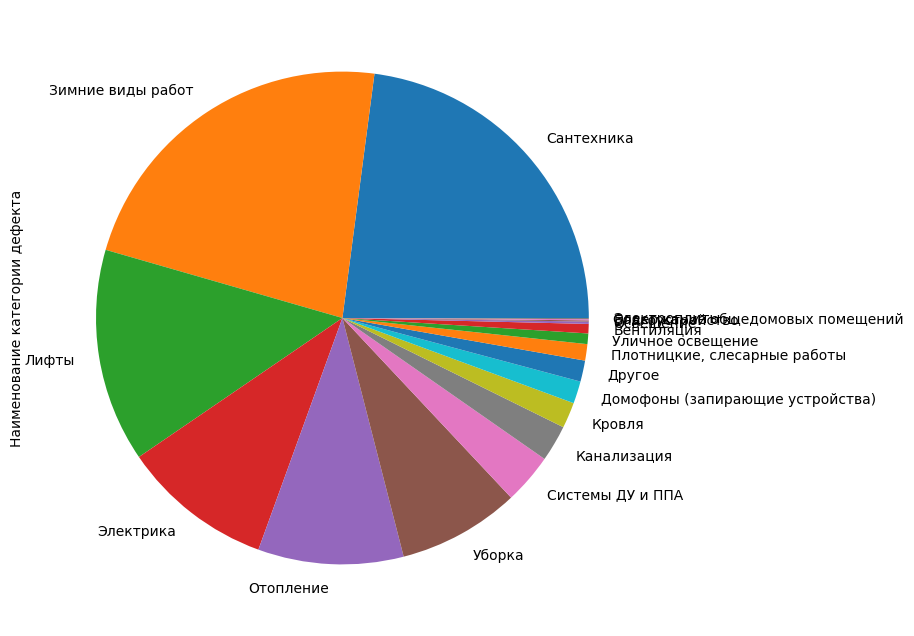

In [181]:
data['Наименование категории дефекта'].value_counts().plot(kind='pie', figsize=(14,8))

In [206]:
data.groupby('Наименование района')['Наименование категории дефекта'].count()

Наименование района
Академический    16
Алексеевский     43
Алтуфьевский      5
Арбат             2
Бабушкинский     23
                 ..
Южное Тушино      5
Южнопортовый      9
Якиманка          2
Ярославский      22
Ясенево          15
Name: Наименование категории дефекта, Length: 120, dtype: int64

Академический    0.125
Алексеевский     0.000
Алтуфьевский     0.000
Арбат            0.000
Бабушкинский     0.000
                 ...  
Южное Тушино     0.200
Южнопортовый     0.000
Якиманка         0.000
Ярославский      0.000
Ясенево          0.000
Length: 120, dtype: float64

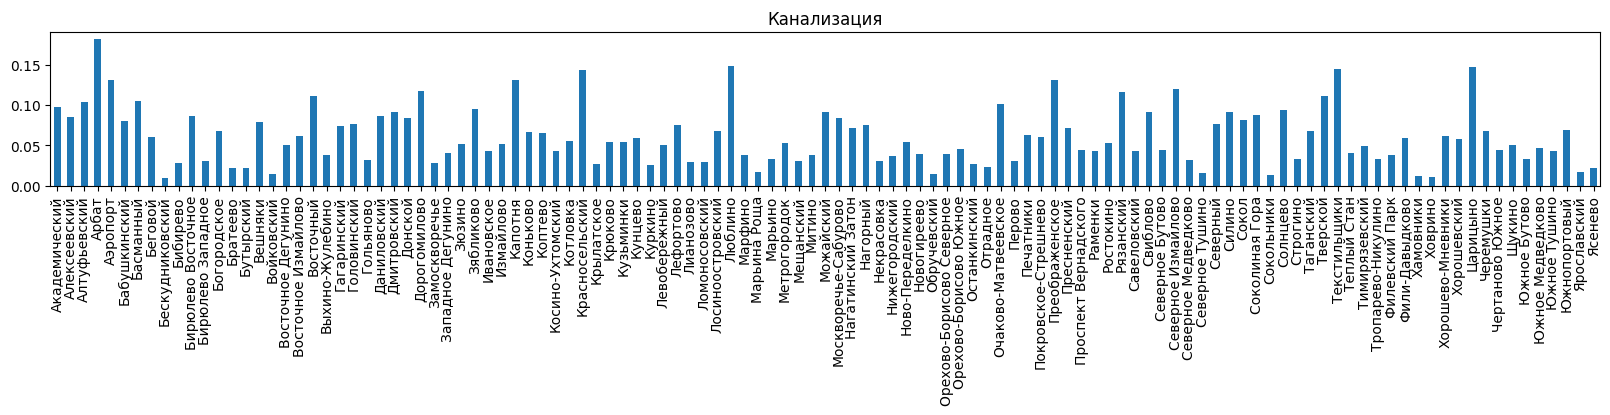

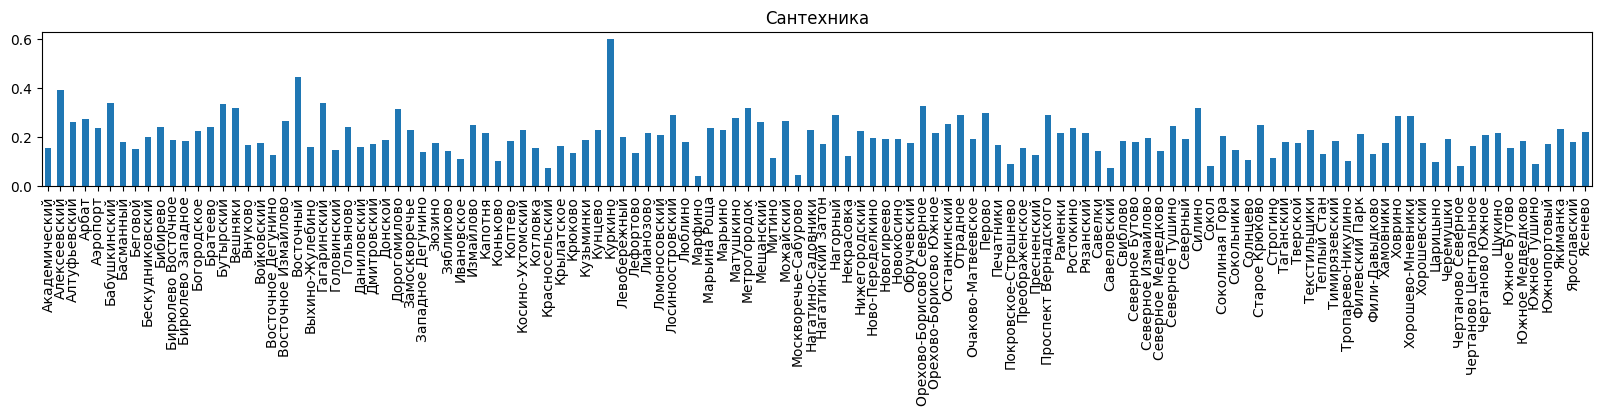

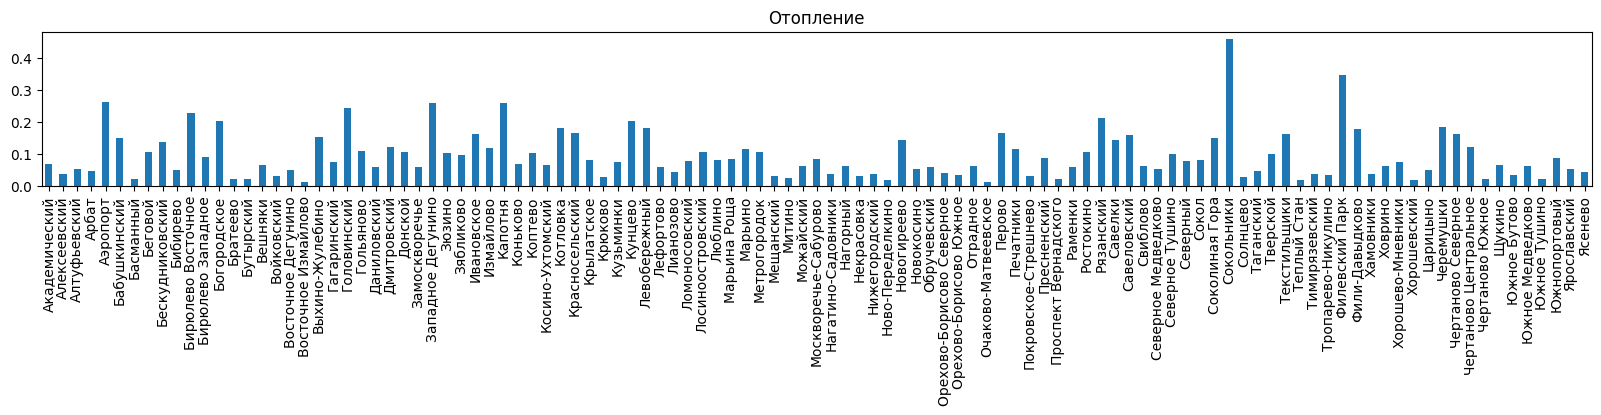

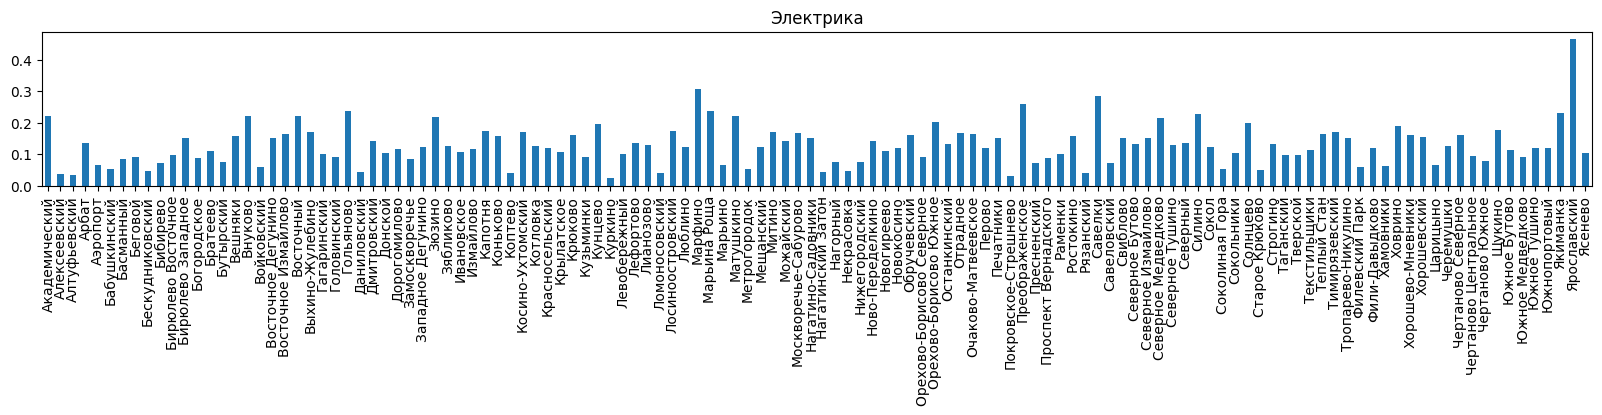

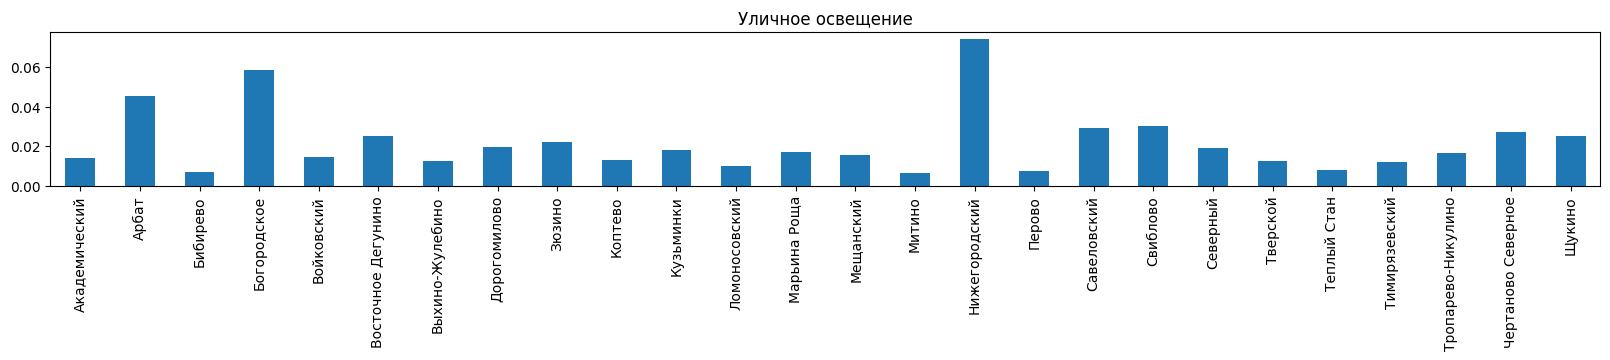

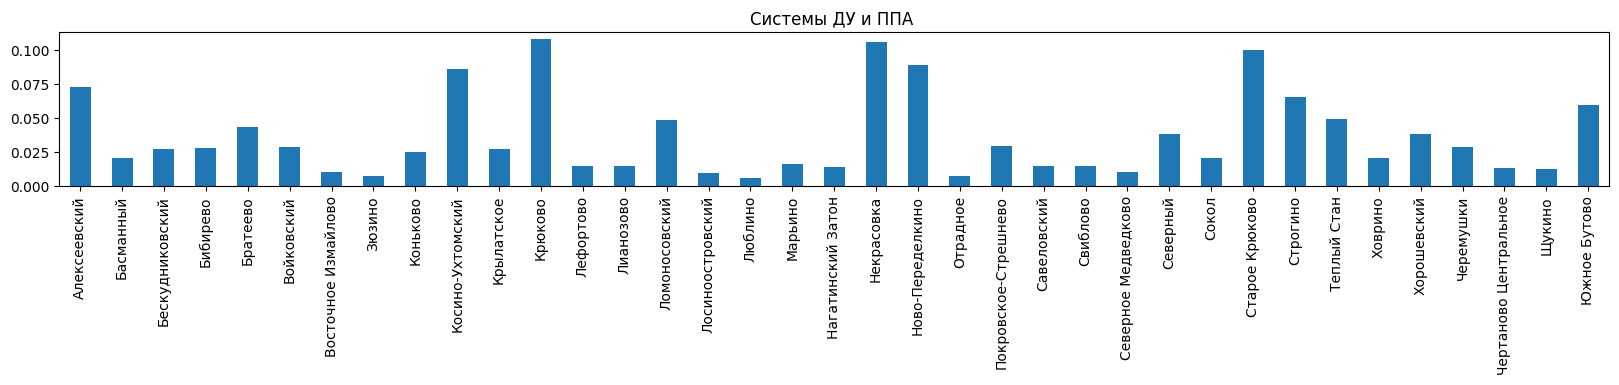

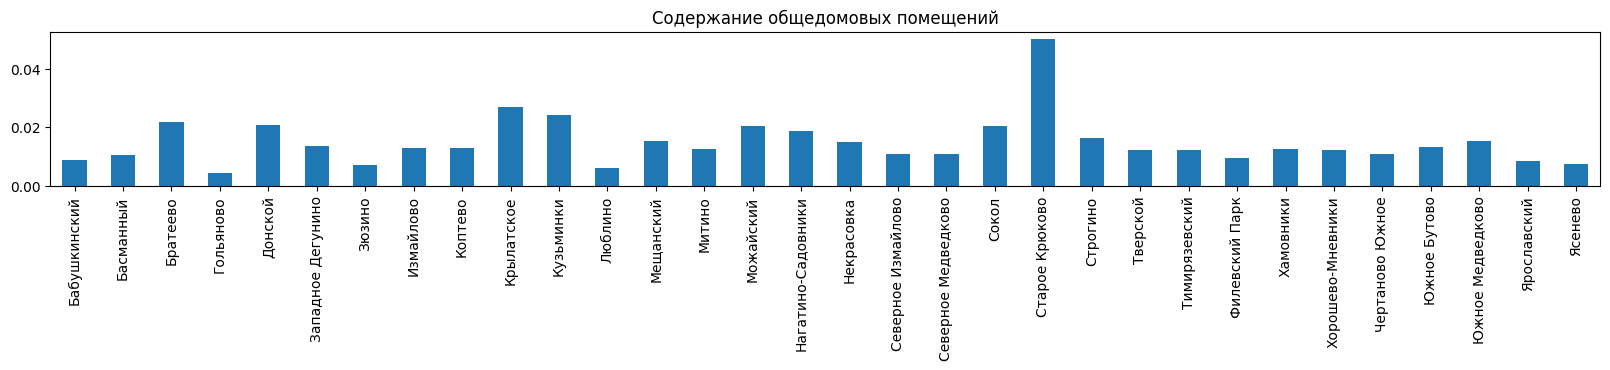

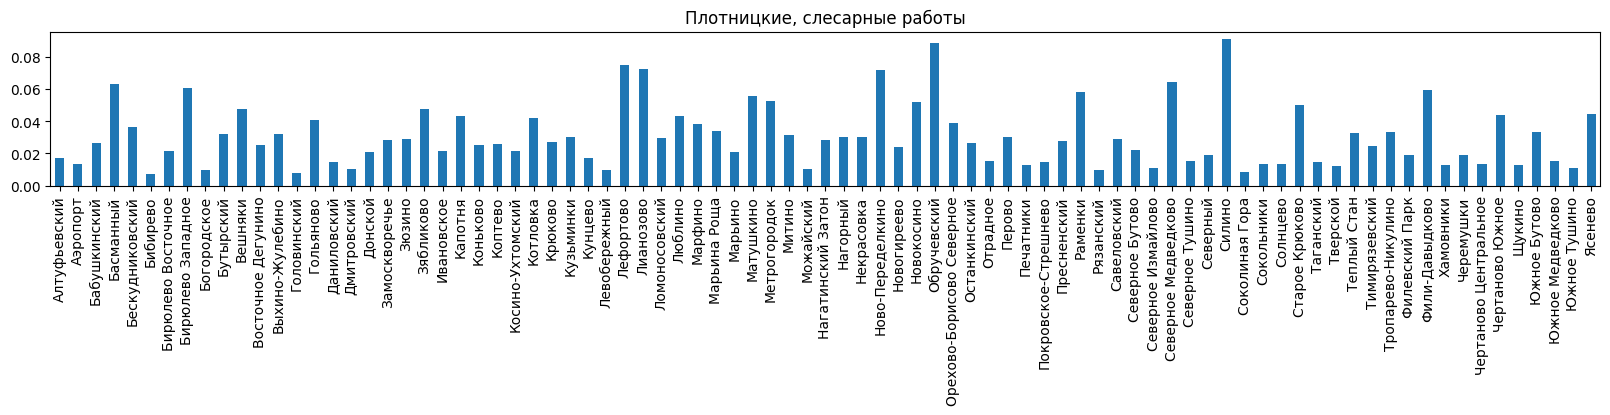

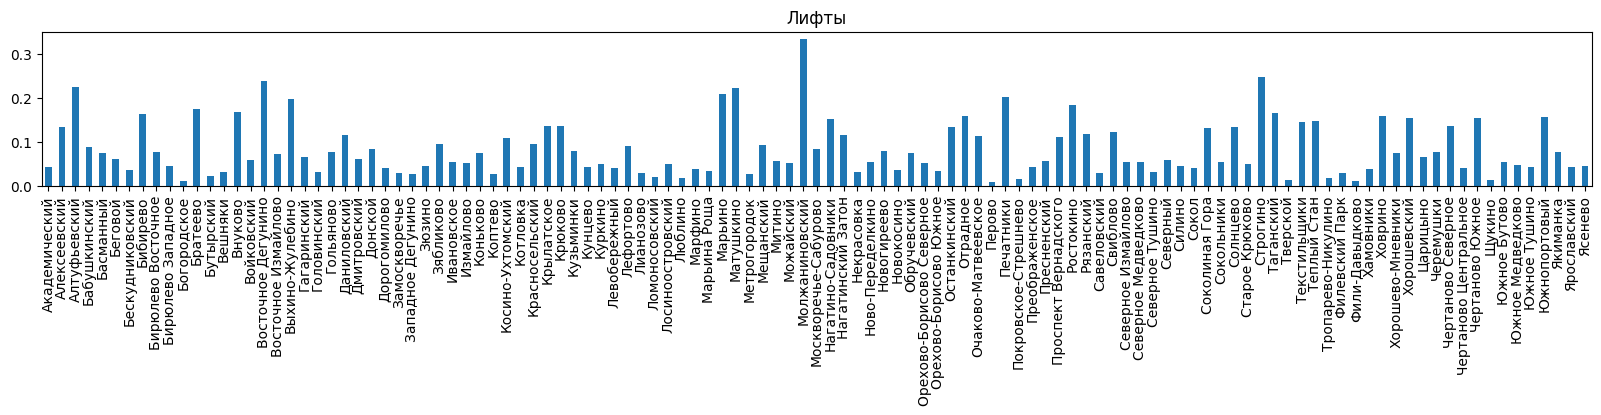

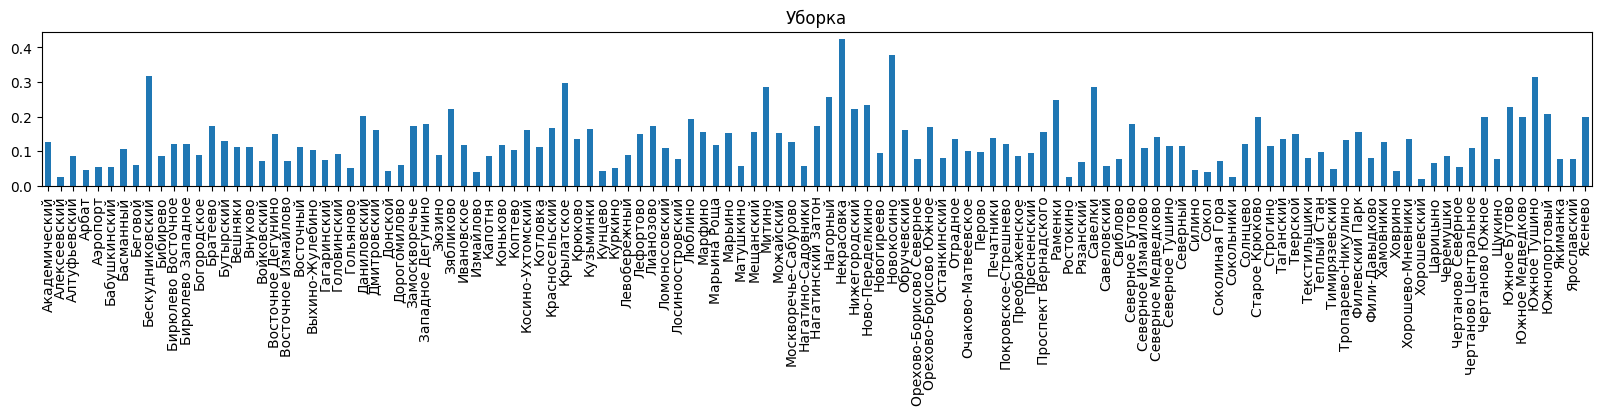

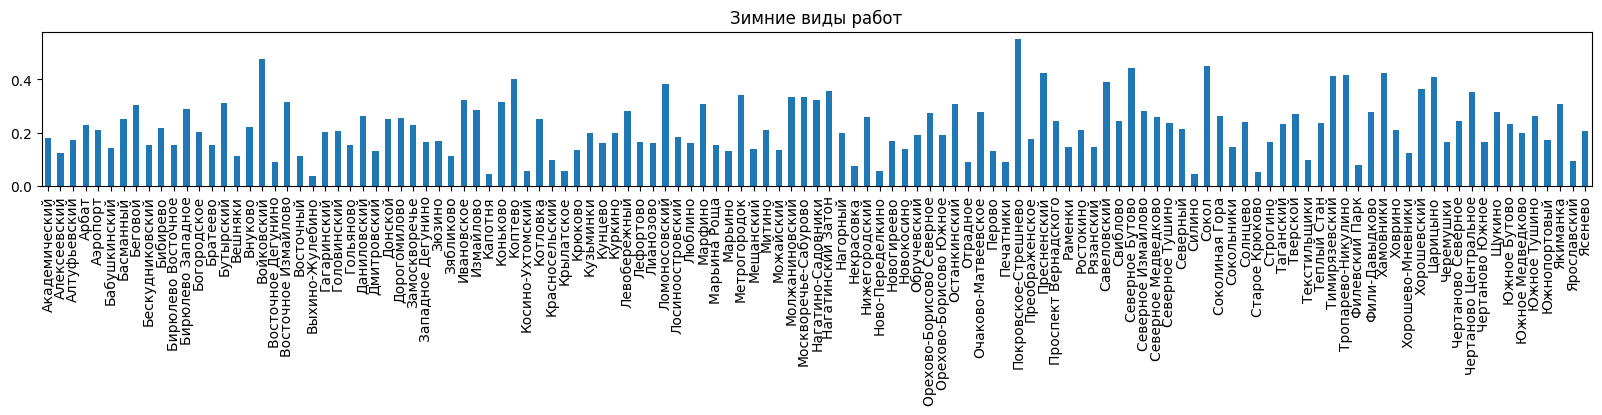

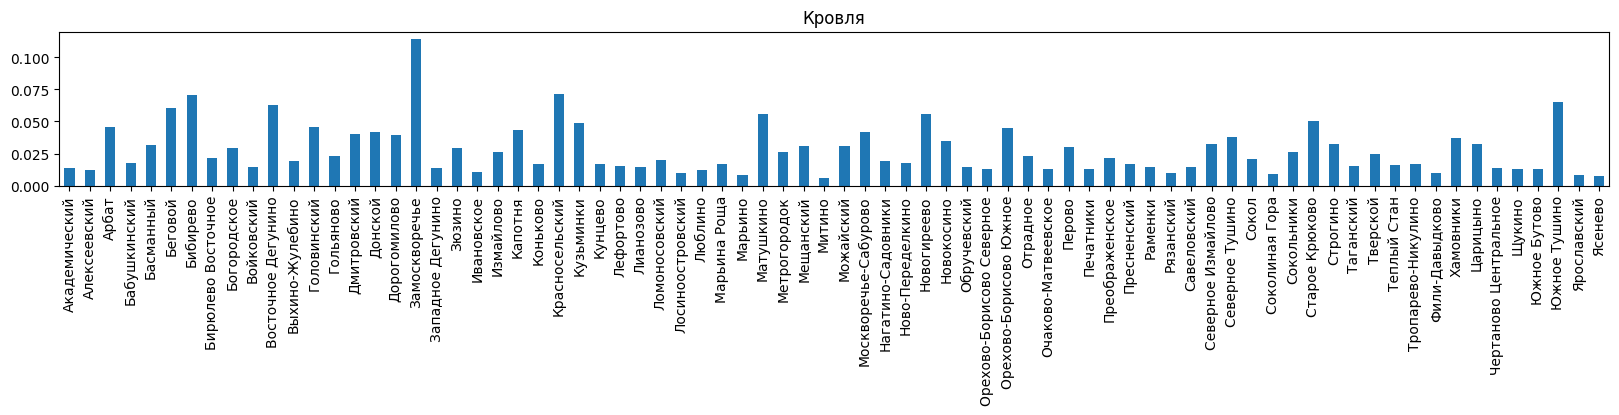

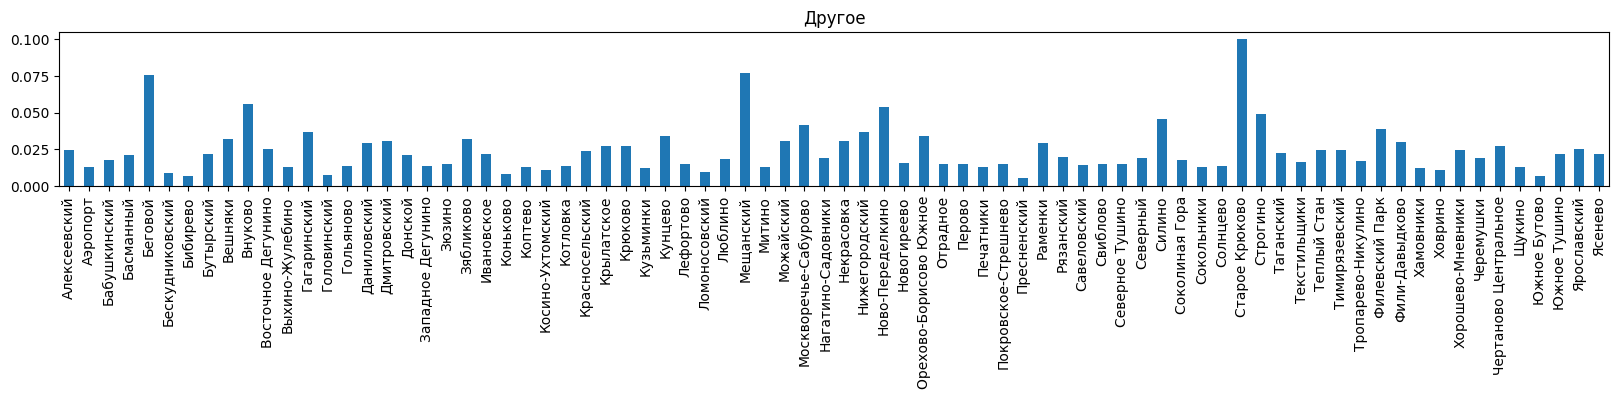

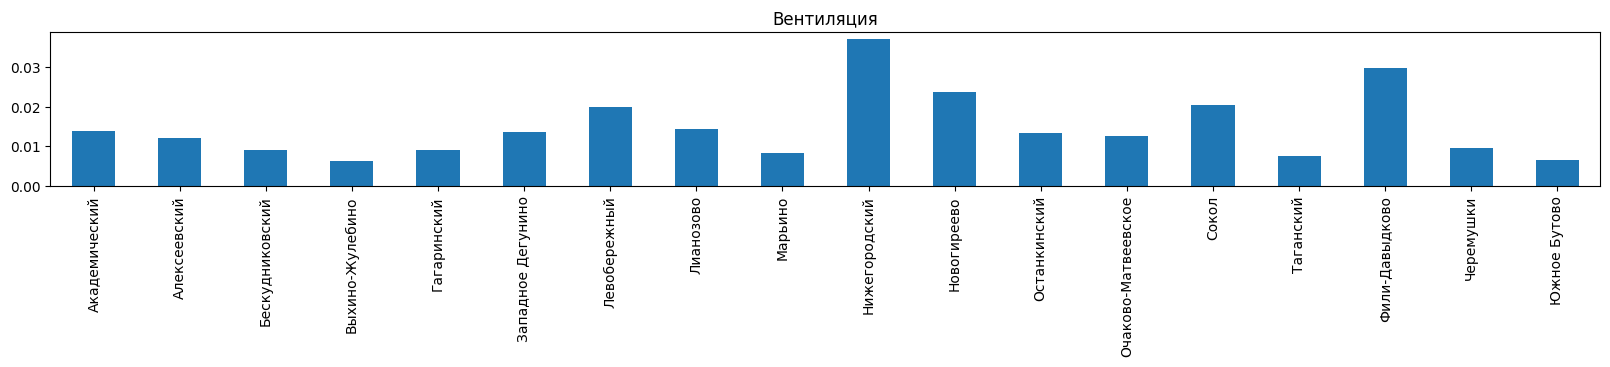

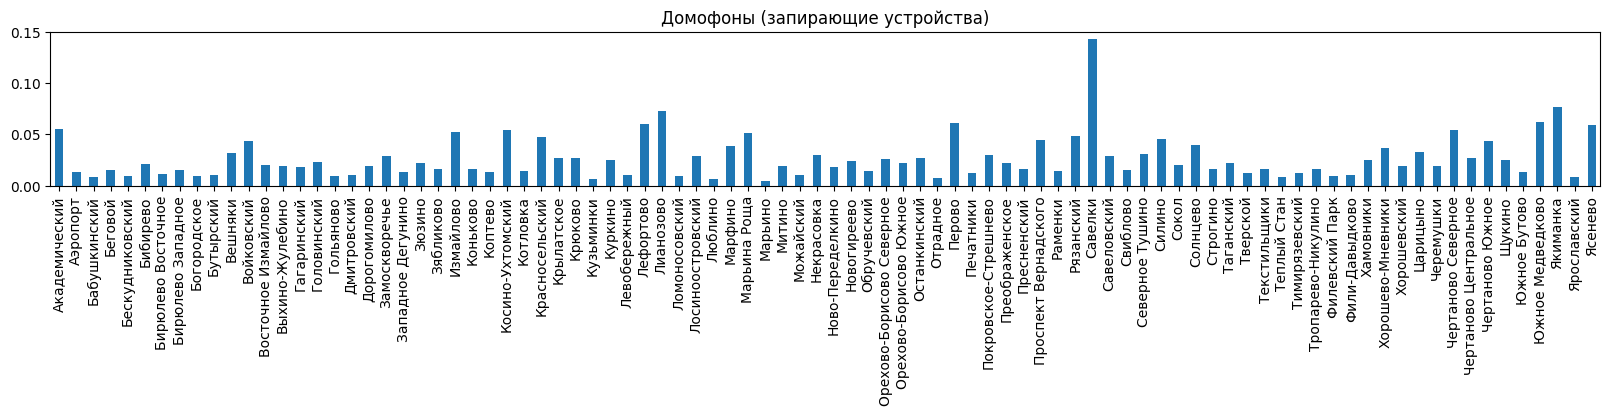

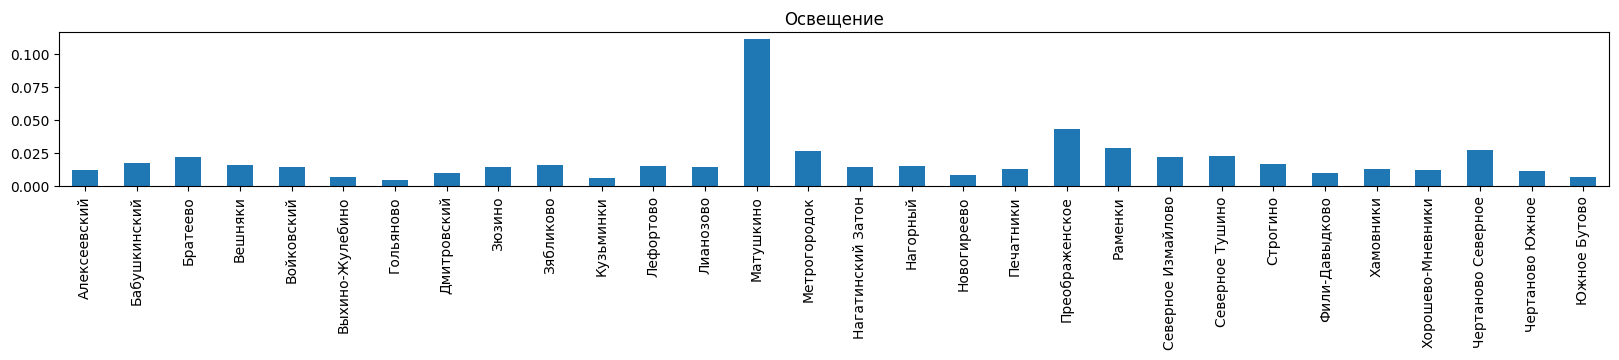

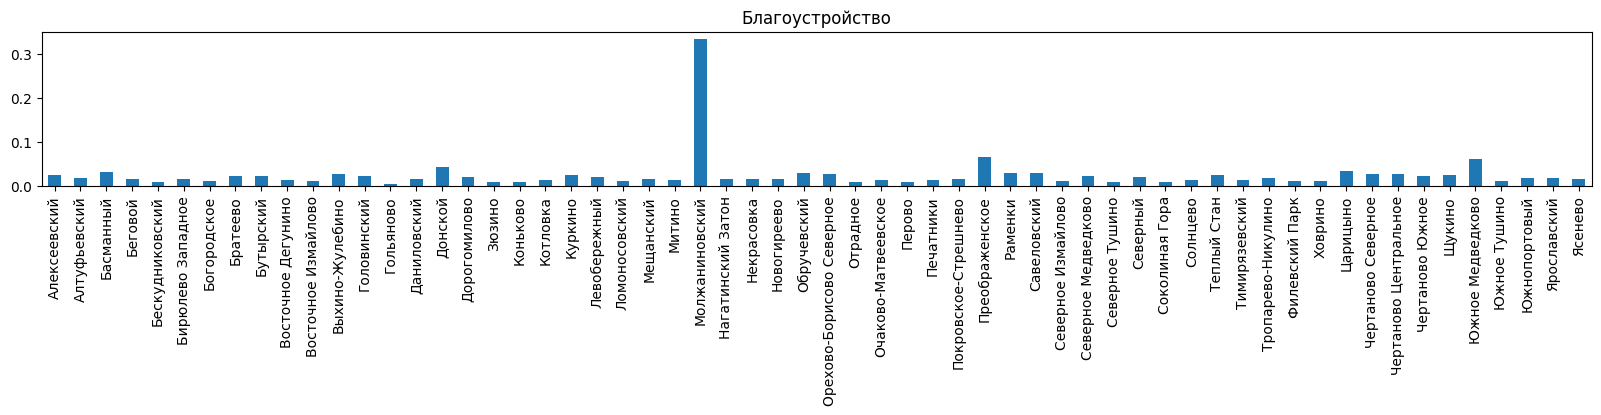

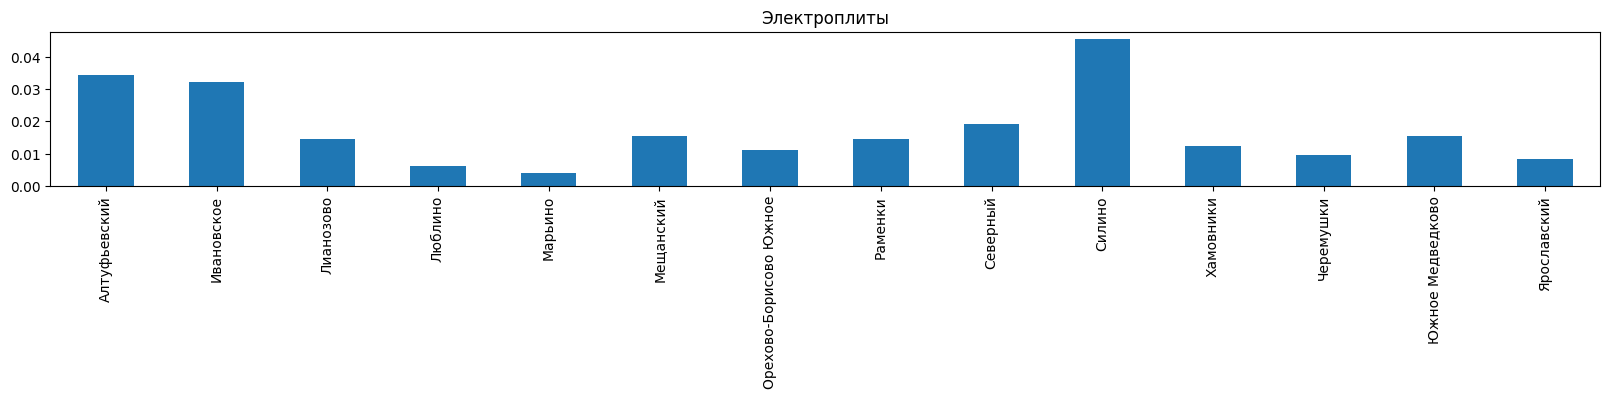

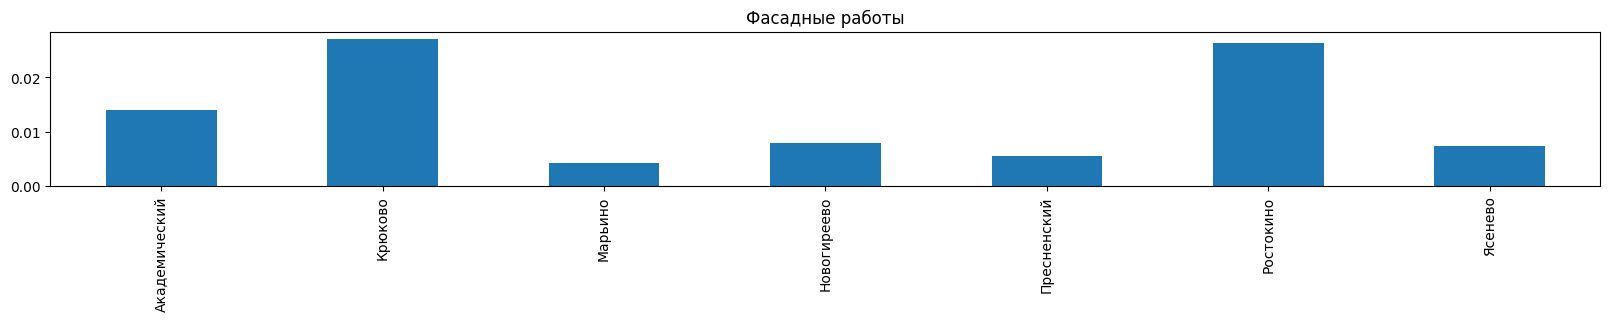

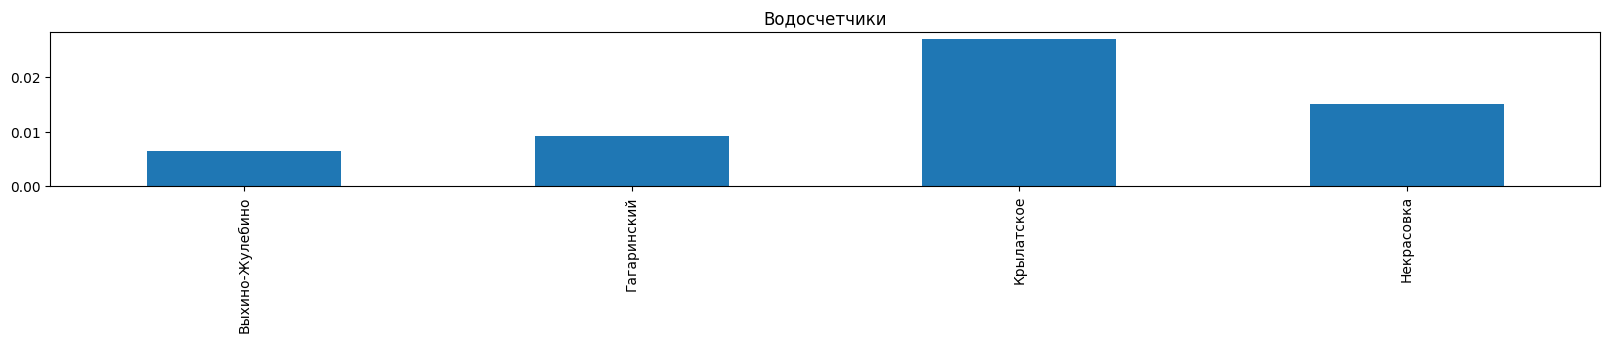

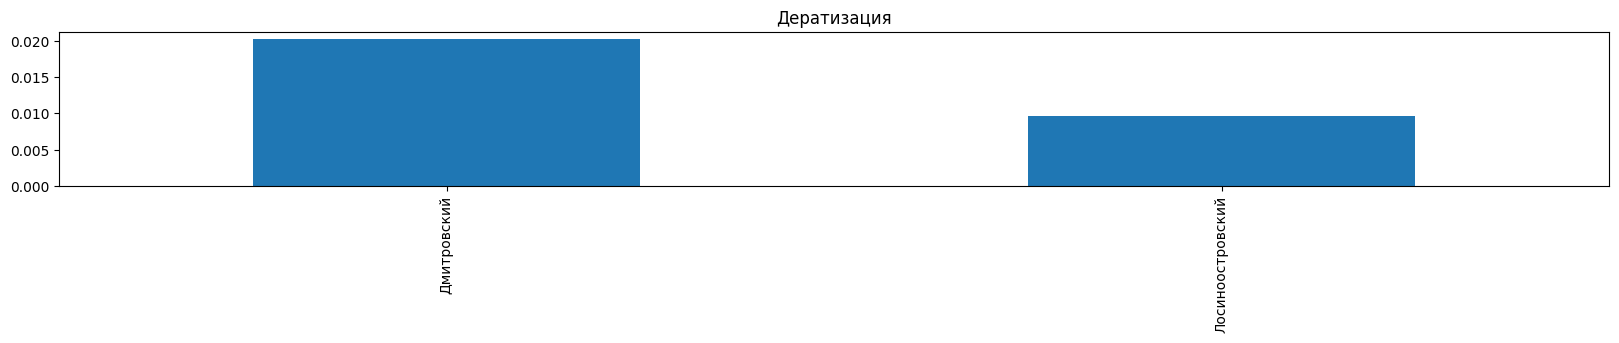

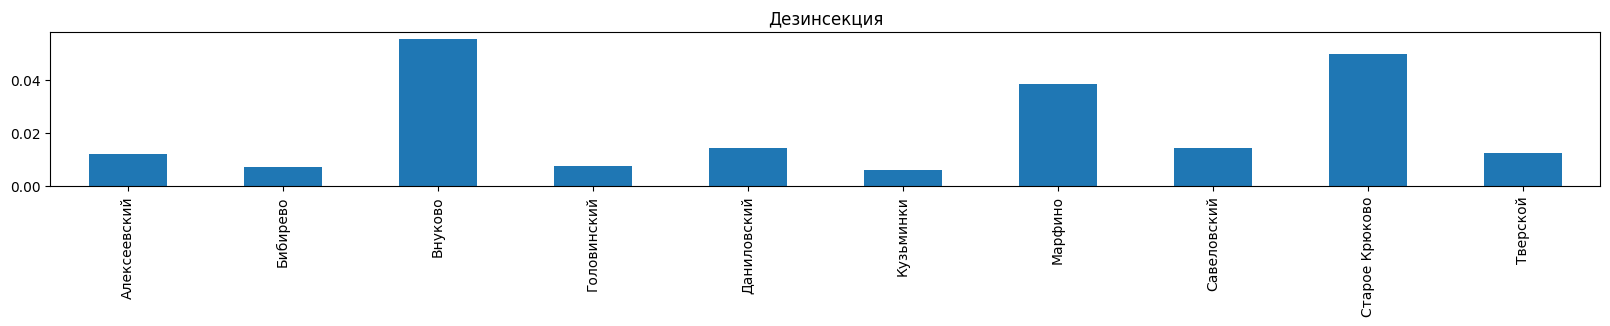

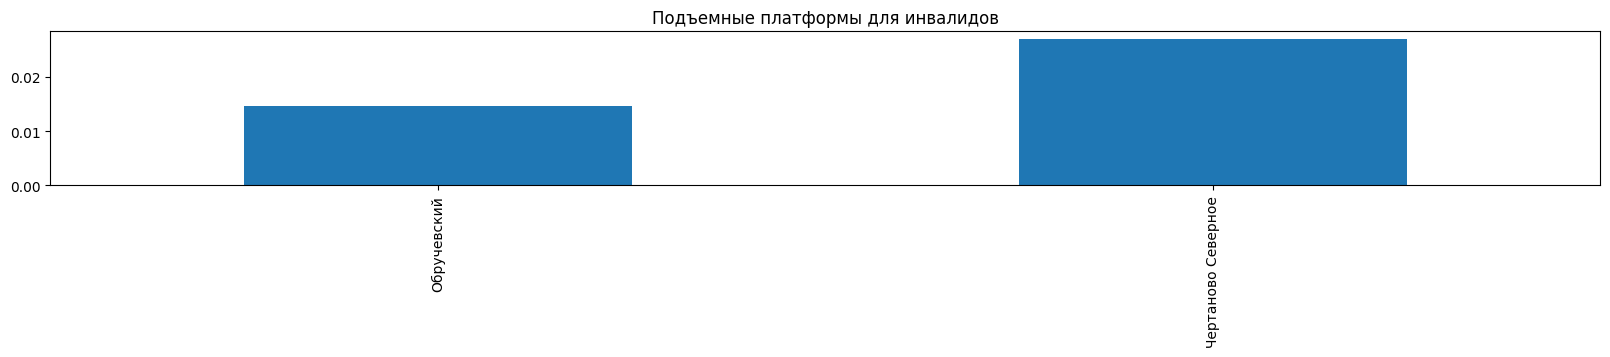

In [39]:
for i in data['Наименование категории дефекта'].unique():
    fig = plt.figure()
    ax = (data[data['Наименование категории дефекта']==i]['Наименование района'].value_counts().sort_index()/data.groupby('Наименование района')['Наименование категории дефекта'].count()).dropna()
    fig.axes.append(ax.plot(kind='bar',figsize=(20,2), title = i))
    plt.show()


In [36]:
(data[data['Наименование категории дефекта']==i]['Наименование района'].value_counts().sort_index()/data.groupby('Наименование района')['Наименование категории дефекта'].count()).mean()

0.20104393958778294

In [ ]:
def anomaly():
    mean3 = (data[data['Наименование категории дефекта']==i]['Наименование района'].value_counts().sort_index()/data.groupby('Наименование района')['Наименование категории дефекта'].count()).mean()
    mean2 = (data[data['Дата создания заявки в формате Timezone']==k]['Наименование района'].value_counts().sort_index()/data.groupby('Наименование района')['Дата создания заявки в формате Timezone'].count()).mean()
    mean4 = (data[data['Дата создания заявки в формате Timezone']-data['Дата закрытия']==l]['Наименование района'].value_counts().sort_index()/data.groupby('Наименование района')[data['Дата создания заявки в формате Timezone']-data['Дата закрытия']].count()).mean()
    for j in range(len(data)):
        x = data.iloc[j]
        if x['Наименование категории дефекта']>mean3:
            return 3
        elif x['Дата создания заявки в формате Timezone']-x['Дата закрытия']>mean4:
            return 4
        elif x['Дата создания заявки в формате Timezone']>mean2:
            return 2
        else:
            return 1